In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("../data/original/train-metadata.csv")
isic_ids = df_train["isic_id"].unique()

/var/folders/vh/wys9_ffj5fzbpb21d4rvh5wr0000gn/T/ipykernel_37951/3104746672.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../data/original/train-metadata.csv")


In [3]:
dict_pred_path = {
    #"lgb_plain" :"../data/outputs/lgb_plain/preds.parquet",
    #"lgb_no_att": "../data/outputs/lgb_no_att/preds.parquet",
    "image_convnext_nes": "../data/outputs/image_convnext_nes/preds.parquet",
    "image_eva_nes": "../data/outputs/image_eva_nes/preds.parquet",
    "sub_71": "../data/sub_71/preds.parquet",
    "sub_73": "../data/sub_73/preds.parquet",
    "sub_75": "../data/sub_75/preds.parquet",
    "sub_77": "../data/sub_77/preds.parquet",
    
}
df_pred = pd.DataFrame()
for k, v in dict_pred_path.items():
    df = pd.read_parquet(v)
    df = df[df["isic_id"].isin(isic_ids)]
    preds = df.sort_values("isic_id").reset_index(drop=True)["pred"].rank(method="average")
    df_pred[k] = preds / preds.max()
    # df_pred[k] = pd.read_parquet(v).sort_values("isic_id").reset_index(drop=True)["pred"]

In [4]:
df_pred.corr(method="spearman").style.background_gradient()

,image_convnext_nes,image_eva_nes,sub_71,sub_73,sub_75,sub_77
image_convnext_nes,1.000000,0.751160,0.610909,0.497468,0.606251,0.481525
image_eva_nes,0.751160,1.000000,0.591300,0.477790,0.593968,0.478233
sub_71,0.610909,0.591300,1.000000,0.777044,0.864761,0.756127
sub_73,0.497468,0.477790,0.777044,1.000000,0.741920,0.760446
sub_75,0.606251,0.593968,0.864761,0.741920,1.000000,0.729829
sub_77,0.481525,0.478233,0.756127,0.760446,0.729829,1.000000


In [5]:
pd.read_parquet("../data/sub_71/preds.parquet")

,isic_id,pred
0,ISIC_0015845,0.001004
1,ISIC_0015902,0.000001
2,ISIC_0024200,0.000006
3,ISIC_0051665,0.000025
4,ISIC_0051812,0.000003
...,...,...
96302,ISIC_0000026,0.021781
96303,ISIC_0000021,0.021045
96304,ISIC_0000011,0.032161
96305,ISIC_0000010,0.010945


In [6]:
dict_pred_path = {
    "lgb_plain_old" :"../data/lgb_plain/preds.parquet",
    "lgb_plain_new" :"../data/outputs/lgb_plain/preds.parquet",
    # "lgb" :"../data/outputs/lgb/preds.parquet",
    "with_att": "../data/kanna/with_att.parquet",
    # "with_attout": "../data/kanna/without_att.parquet",
    "pred_lgb_69": "../data/fyk/pred_lgb_exp69.parquet",
    # "pred_lgb_70": "../data/fyk/pred_lgb_exp70.parquet",
    # "pred_lgb_78": "../data/fyk/pred_lgb_exp78.parquet",
    # "pred_lgb_79": "../data/fyk/pred_lgb_exp79.parquet",
    # "pred_lgb_85": "../data/fyk/pred_lgb_exp85.parquet",
    # "pred_lgb_86": "../data/fyk/pred_lgb_exp86.parquet",
    # "pred_xgb_69": "../data/fyk/pred_lgb_exp69.parquet",
    # "pred_xgb_70": "../data/fyk/pred_lgb_exp70.parquet",
    # "pred_xgb_78": "../data/fyk/pred_lgb_exp78.parquet",
    # "pred_xgb_79": "../data/fyk/pred_lgb_exp79.parquet",
    # "pred_xgb_85": "../data/fyk/pred_lgb_exp85.parquet",
    # "pred_xgb_86": "../data/fyk/pred_lgb_exp86.parquet",
}
df_pred = pd.DataFrame()
for k, v in dict_pred_path.items():
    df_pred[k] = pd.read_parquet(v).sort_values("isic_id").reset_index(drop=True)["pred"]

In [7]:
df_pred.corr(method="spearman").style.background_gradient()

,lgb_plain_old,lgb_plain_new,with_att,pred_lgb_69
lgb_plain_old,1.000000,0.590386,0.672486,0.652425
lgb_plain_new,0.590386,1.000000,0.335529,0.286180
with_att,0.672486,0.335529,1.000000,0.785602
pred_lgb_69,0.652425,0.286180,0.785602,1.000000


In [8]:
dict_pred_path = {
    "with_att": "../data/kanna/with_att.parquet",
    "lgb_plain_old" :"../data/lgb_plain/preds.parquet",
    "lgb_plain_new" :"../data/outputs/lgb/preds.parquet",
}

df_pred = df_train[["isic_id"]].sort_values("isic_id")
for k, v in dict_pred_path.items():
    df = pd.read_parquet(v)
    df = df[df["isic_id"].isin(isic_ids)]
    preds = df.sort_values("isic_id").reset_index(drop=True)["pred"].rank(method="average")
    df_pred[k] = preds / preds.max()

In [9]:
df_pred

,isic_id,with_att,lgb_plain_old,lgb_plain_new
0,ISIC_0015670,0.183305,0.253599,0.762905
1,ISIC_0015845,0.996225,0.999898,0.999925
2,ISIC_0015864,0.049013,0.099786,0.237195
3,ISIC_0015902,0.665967,0.726965,0.351140
4,ISIC_0024200,0.420447,0.538928,0.074066
...,...,...,...,...
401054,ISIC_9999937,0.941707,0.897678,0.982015
401055,ISIC_9999951,0.425927,0.477431,0.762905
401056,ISIC_9999960,0.899903,0.941288,0.674504
401057,ISIC_9999964,0.245620,0.115778,0.862293


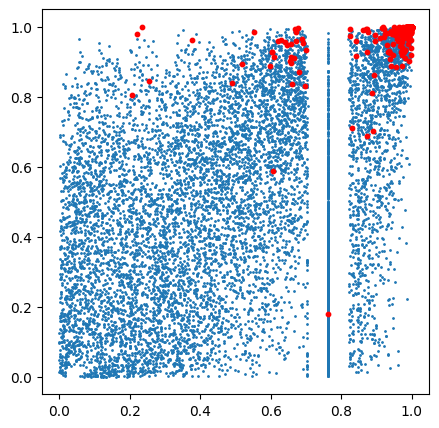

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(5,5))
df_pos = df_pred[df_pred["isic_id"].isin(df_train[df_train["target"]==1]["isic_id"].unique())]
df_sampled = df_pred.sample(10000)
ax.scatter(df_sampled["lgb_plain_new"].values, df_sampled["with_att"].values, s=1)
ax.scatter(df_pos["lgb_plain_new"].values, df_pos["with_att"].values, s=10, c="red")